# SALES PREDICTION TASK-5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the Datasets

In [2]:
# Load the CSV file
file_path = r'C:\Users\anand\OneDrive\Desktop\Advertising.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')  # Try different encoding if needed
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Alternative encoding

In [3]:
# Display the first few rows and column names of the dataset
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Column Names:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


## Data Preprocessing

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)


Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Types:
Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


## Exploratory Data Analysis (EDA)

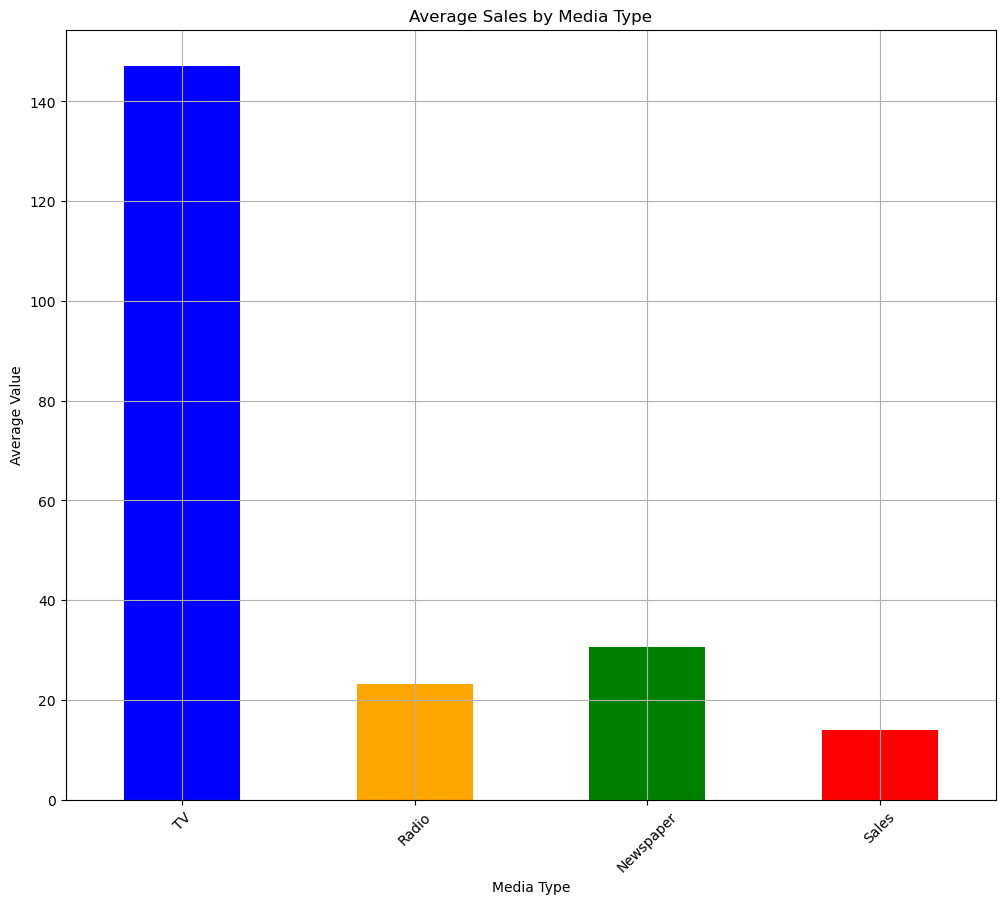

In [12]:
# 1. Bar Plot of Average Sales by Media Type
avg_sales_by_media = df[['TV', 'Radio', 'Newspaper', 'Sales']].mean()
plt.figure(figsize=(12, 10))
avg_sales_by_media.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Sales by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

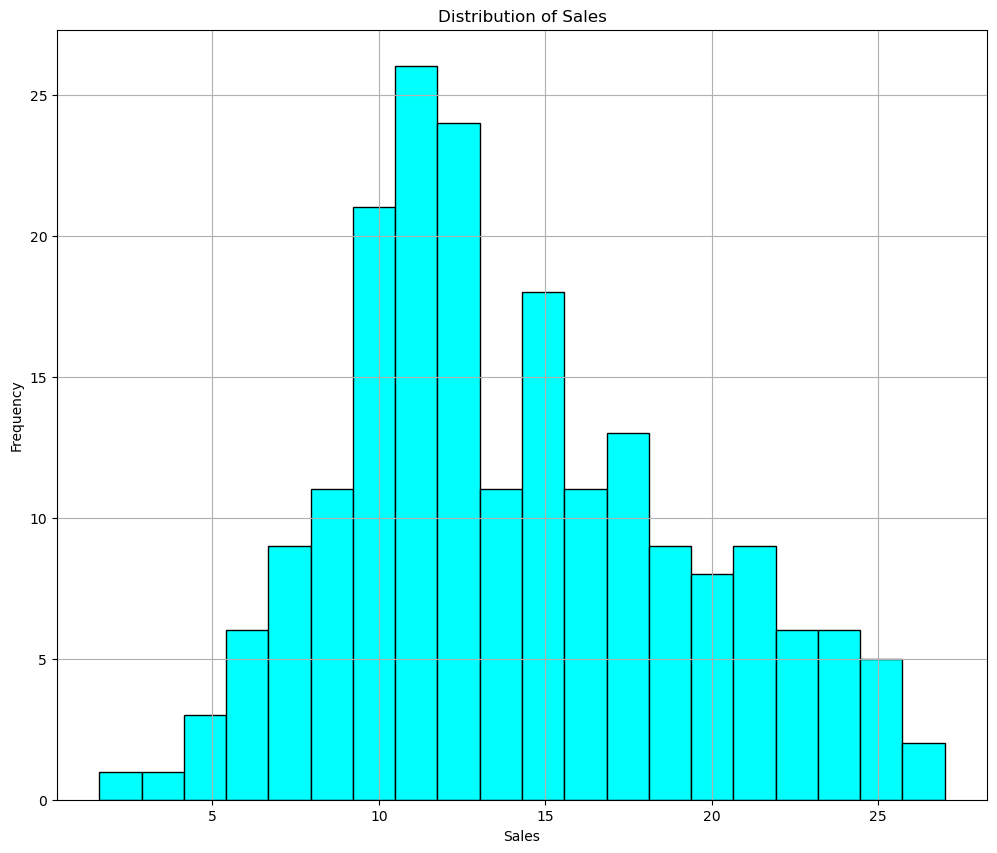

In [13]:
# 2. Histogram of Sales
plt.figure(figsize=(12, 10))
plt.hist(df['Sales'], bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

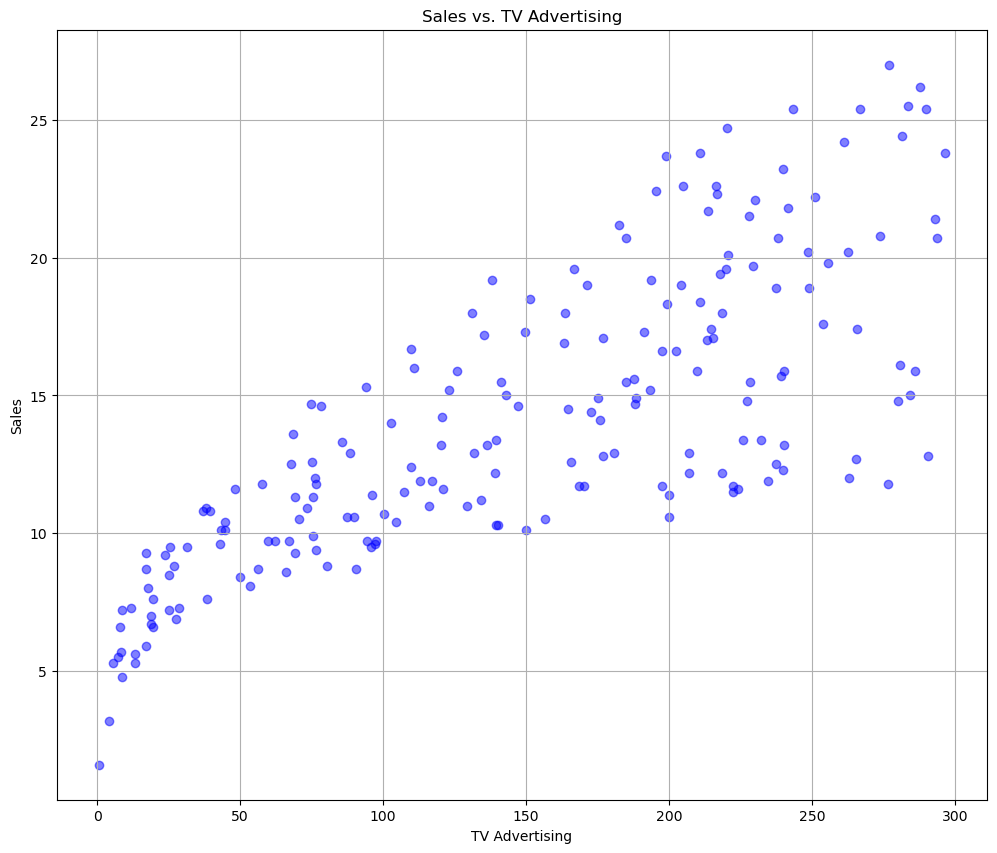

In [14]:
# 3. 2D Plot: Sales vs. TV Advertising
plt.figure(figsize=(12, 10))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.5)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

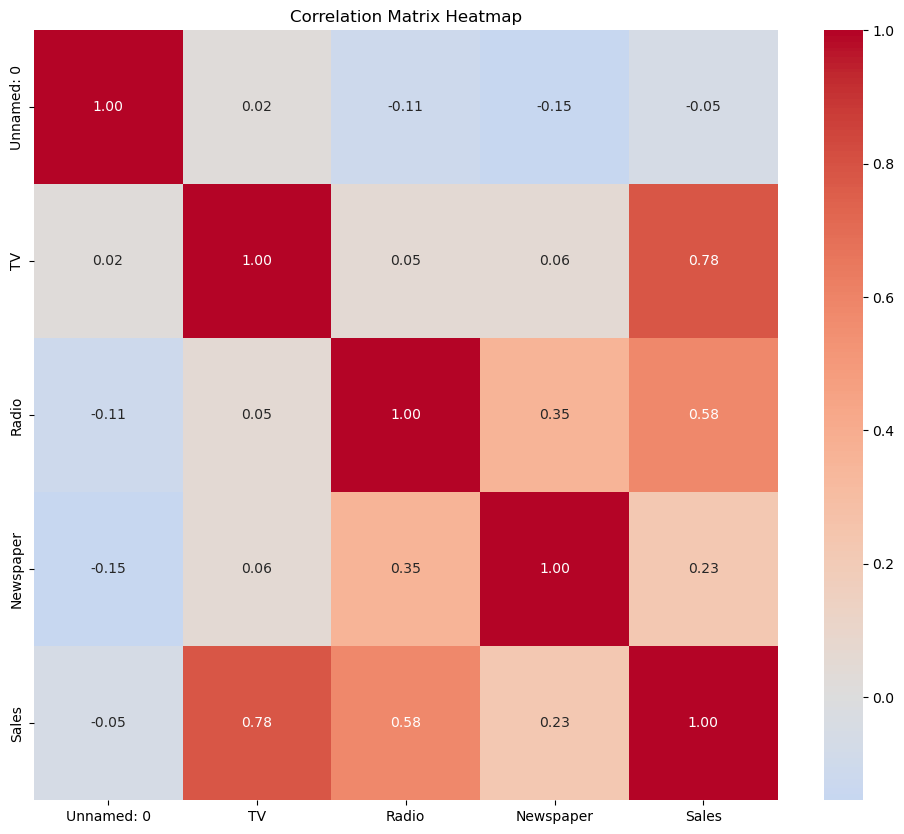

In [15]:
# 4. Heatmap of Correlation Matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

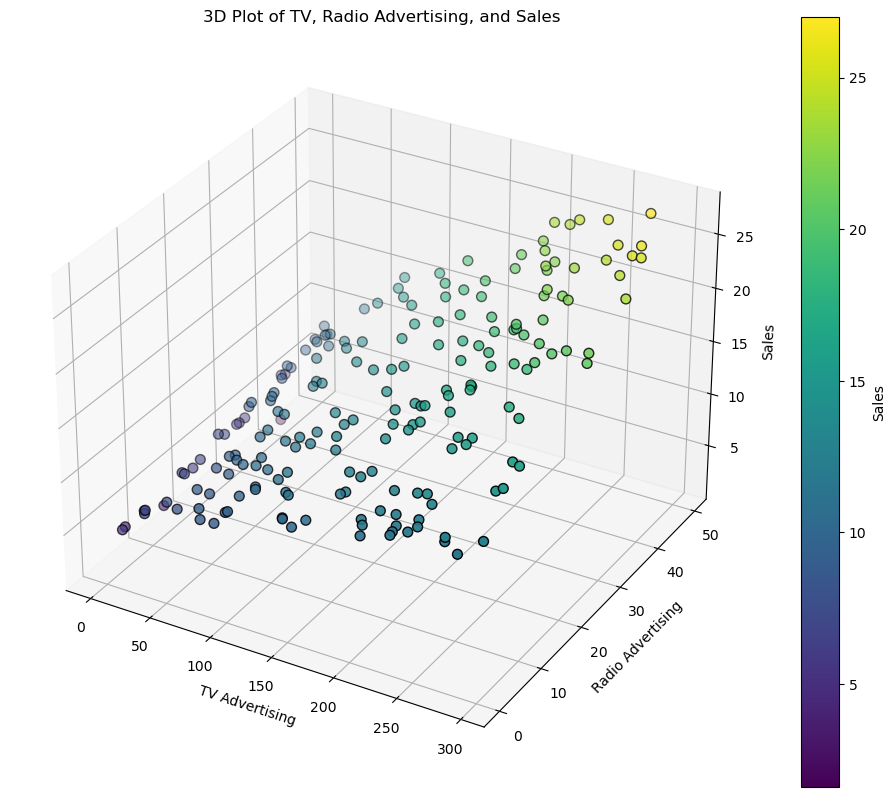

In [16]:
# 5. 3D Plot: TV vs. Radio vs. Sales
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# Prepare data for 3D plot
x = df['TV']
y = df['Radio']
z = df['Sales']
# 3D scatter plot
sc = ax.scatter(x, y, z, c=z, cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('TV Advertising')
ax.set_ylabel('Radio Advertising')
ax.set_zlabel('Sales')
ax.set_title('3D Plot of TV, Radio Advertising, and Sales')
# Adding a color bar for reference
plt.colorbar(sc, label='Sales')
plt.show()

## Building a Sales Prediction Model

In [20]:
# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
# Model evaluation
print("\nModel Evaluation:")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"R^2 Score (Test): {r2_score(y_test, y_test_pred):.2f}")

# Coefficients
print("\nModel Coefficients:")
print(f"TV: {model.coef_[0]:.2f}")
print(f"Radio: {model.coef_[1]:.2f}")
print(f"Newspaper: {model.coef_[2]:.2f}")

print("\nIntercept:")
print(f"{model.intercept_:.2f}")


Model Evaluation:
Mean Squared Error (Test): 3.17
R^2 Score (Test): 0.90

Model Coefficients:
TV: 0.04
Radio: 0.19
Newspaper: 0.00

Intercept:
2.98


## Plotting Actual vs Predicted Values for Training and Test Data

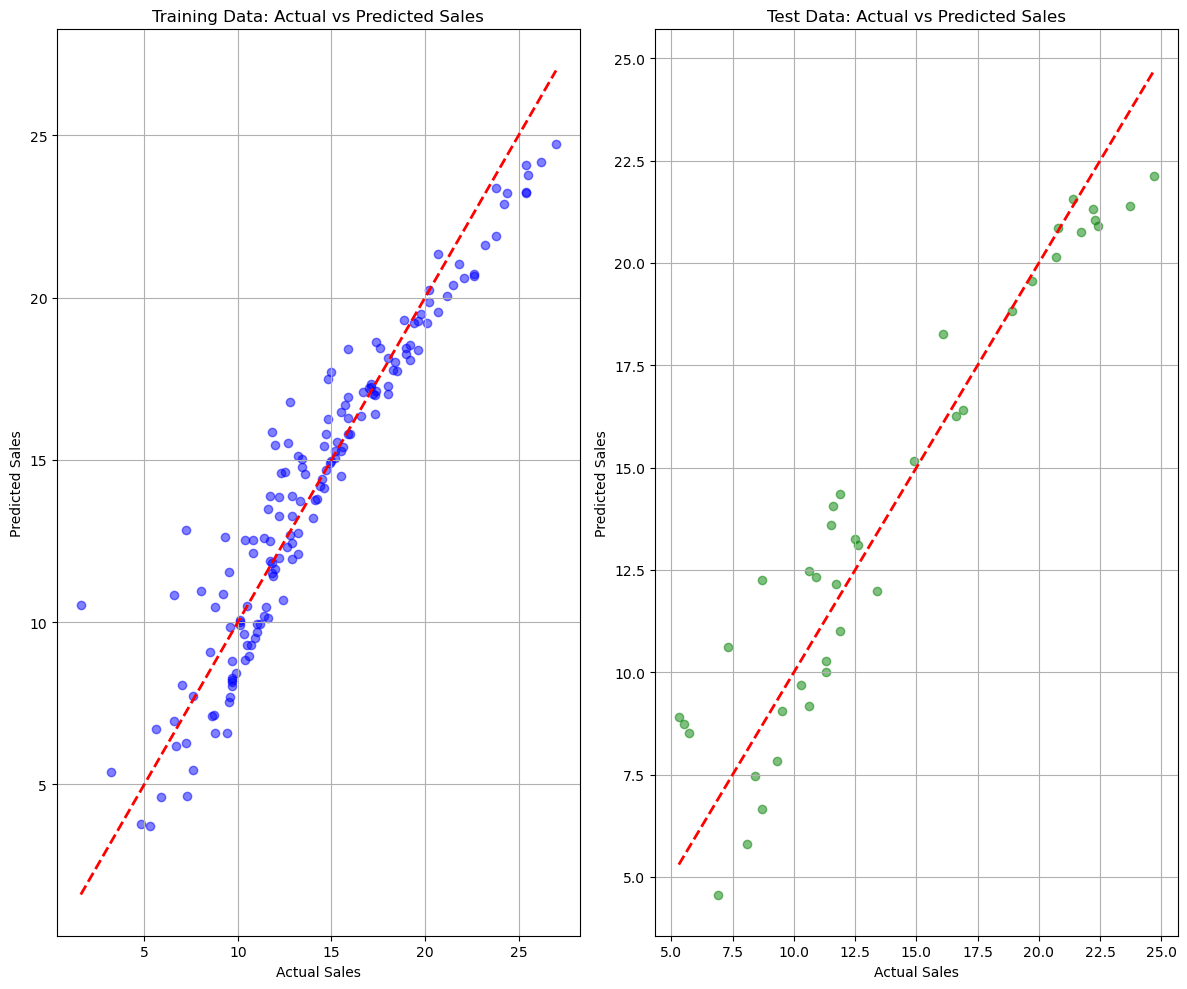

In [23]:
plt.figure(figsize=(12, 10))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Training Data: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)

# Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Test Data: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)

plt.tight_layout()
plt.show()